## Importando bibliotecas

In [1]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

## Definindo variáveis globais

In [2]:
# Variáveis globais

# Bolsa
d_b = 0.0025                        # Espessura da bolsa (m)
k_bs = 0.15                         # Condutividade térmica da borracha (W/(m*K))
k_bi = 0.15                         # Condutividade térmica da borracha (W/(m*K))
A_b = 0.0897                        # Área da bolsa em contato com o líquido, a mesa e o ar (m²)
c_bi = 1549.116                     # Calor específico da superfície inferior da bolsa (J/(kg*K))
c_bs = 1549.116                     # Calor específico da superfície superior da bolsa (J/(kg*K))
m_b = 0.3389                        # Massa da bolsa (kg)
m_bi = m_b/2                        # Massa da superfície inferior da bolsa (kg)
m_bs = m_b/2                        # Massa da superfície superior da bolsa (kg)

# Mesa
d_m = 0.0361                        # Espessura da mesa (m)
k_m = 0.18                          # Condutividade térmica da mesa (W/(m*K))

# Isolante
d_i = 0.00156                       # Espessura do isolante (m)
k_i = 0.15                          # Condutividade térmica do isolante (W\(m*K))

# Ar
h_ar = 4.8                          # Convecção do ar (W/(m²*K))

# Líquido
m_liq = 0.9661                      # Massa do líquido (kg)
c_liq = 4186                        # Calor específico do líquido (J/(kg*K))

## Criando os resistores da analogia eletro-térmica

In [3]:
# Resistores da analogia eletrotérmica
R_cond_bi = (d_b/2)/(k_bi*A_b)
R_cond_bs = (d_b/2)/(k_bs*A_b)
R_conv = 1/(h_ar*A_b)
R_condM = d_m/(k_m*A_b)
R_condI = d_i/(k_i*A_b)

## Criando as funções

In [4]:
# Função que calcula as derivadas das temperaturas
def derivadas(T0, t):
    # Define as temperaturas com base em T0
    T_bi = T0[0]
    T_bs = T0[1]
    T_liq = T0[2]
    
    # Calcula o Q
    Q1 = (T_liq - T_bi)/R_cond_bi
    Q2 = (T_bi - T_amb)/(R_cond_bi + R_conv + R_condM + R_condI)
    Q3 = (T_liq - T_bs)/R_cond_bs
    Q4 = (T_bs - T_amb)/(R_cond_bs + R_conv)
    
    # Calcula as derivadas de U (dUx/dt)
    Ul_dt = -(Q1 + Q3)
    Ubi_dt = Q1 - Q2
    Ubs_dt = Q3 - Q4

    # Calcula as derivadas de T (dTx/dt)
    dTl_dt = (1/(m_liq * c_liq)) * Ul_dt
    dTbi_dt = (1/(m_bi * c_bi)) * Ubi_dt
    dTbs_dt = (1/(m_bs * c_bs)) * Ubs_dt

    return [dTbi_dt, dTbs_dt, dTl_dt]

## Define as condições iniciais, aplica ODEINT e plota os gráficos

Para uma temperatura inicial igual a: 63.5°C, a temperatura do líquido atingiu o equilíbrio (26.53°C) em 3h e 53min


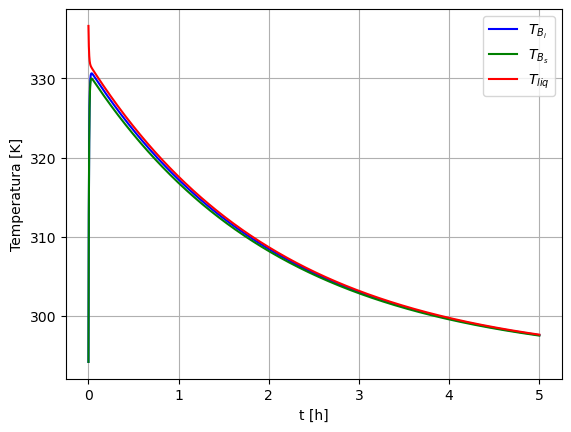

In [9]:
# Temperaturas iniciais
K0 = 273.15                                    # Constante de conversão de Celsius para Kelvin

T_amb = 21 + K0                                # Temperatura ambiente (K)
T_liq = 63.5 + K0                              # Temperatura inicial do líquido (K)
T_bi = T_amb                                   # Temperatura inicial da superfície inferior da bolsa (K)
T_bs = T_amb                                   # Temperatura inicial da superfície superior da bolsa (K)



# Condições iniciais
T0 = [T_bi, T_bs, T_liq]
lista_t = np.arange(0, 18000)


# Aplica ODEINT
sol = odeint(derivadas, T0, lista_t)

temperatura = sol[:, 2]
tempo = 0
T_amb_m5 = T_amb

for i in range(len(temperatura)):
    t = temperatura[i]
    if T_liq > (T_amb):
        if t < (T_amb*1.02):
            tempo = (lista_t[i])
            break
    elif T_liq < (T_amb):
        if t > (T_amb*0.98):
            tempo = (lista_t[i])
            break
            
horas = (tempo/60/60)
resto = horas - int(horas)
horas = math.floor(horas)
minu = 30*resto/0.5

print(f'Para uma temperatura inicial igual a: {T_liq - 273.15}°C, a temperatura do líquido atingiu o equilíbrio ({T_amb*1.02-273.5:.2f}°C) em {horas:.0f}h e {minu:.0f}min')
            
# Plotando os gráficos
plt.plot(lista_t/3600, sol[:, 0], 'b', label='$T_{B_i}$')
plt.plot(lista_t/3600, sol[:, 1], 'g', label='$T_{B_s}$')
plt.plot(lista_t/3600, sol[:, 2], 'r', label='$T_{liq}$')
plt.xlabel('t [h]')
plt.ylabel('Temperatura [K]')
plt.legend()
plt.grid()
plt.show()

## Dados experimentais

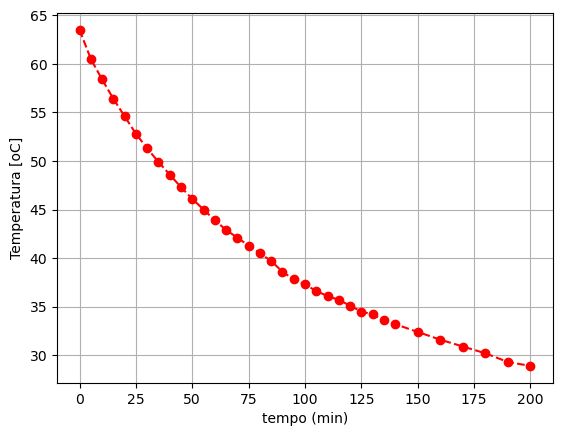

In [10]:
temperatura = [63.5, 60.5, 58.4, 56.4, 54.6, 52.8, 51.3, 49.9, 48.6, 47.3, 46.1, 45.0,
                43.9, 42.9, 42.1, 41.3, 40.5, 39.7, 38.6, 37.8, 37.3, 36.6, 36.1, 35.7,
                35.1, 34.5, 34.2, 33.6, 33.2, 32.4, 31.6, 30.9, 30.2, 29.3, 28.9]

tempo = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
          105, 110, 115, 120, 125, 130, 135, 140, 150, 160, 170, 180, 190, 200]

plt.plot(tempo, temperatura, 'r--o')
plt.xlabel('tempo (min)')
plt.ylabel('Temperatura [oC]')
plt.grid()
plt.show()

## Ajustando o coeficiente de convecção do ar

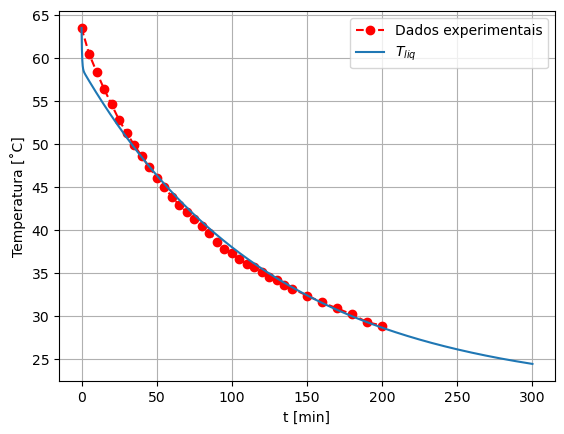

In [11]:
plt.plot(tempo, temperatura, 'r--o', label = 'Dados experimentais')
plt.plot(lista_t/60, sol[:, 2]-273.15, label='$T_{liq}$')
plt.xlabel('t [min]')
plt.ylabel('Temperatura [˚C]')
plt.legend()
plt.grid()
plt.show()

## Implementando ODEINT diversas vezes para temperaturas iniciais diferentes

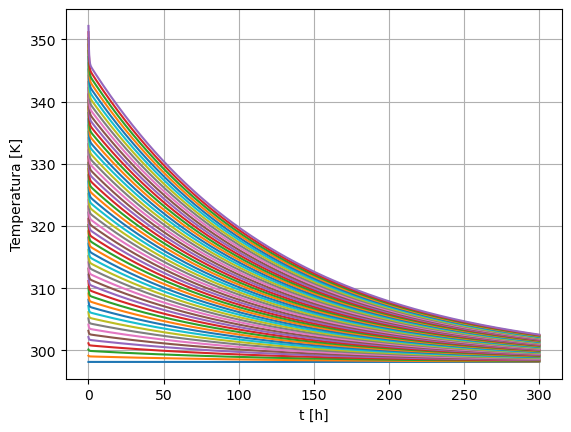

In [14]:
temperaturas_iniciais = np.arange(25,80)

lista_t = np.arange(0, 18000, 1)

for i in range(len(temperaturas_iniciais)):
    T_liq = temperaturas_iniciais[i] + K0      # Temperatura inicial (K)
    T_amb = 25 + K0                            # Temperatura ambiente (K)
    T_bi = T_liq + K0                             # Temperatura inicial da superfície inferior da bolsa (K)
    T_bs = 25 + K0                             # Temperatura inicial (K)
    T0 = [T_bi, T_bs, T_liq]
    
    
    sol = odeint(derivadas, T0, lista_t)
    
    plt.plot(lista_t/60, sol[:, 2], label=f'$T_l = {T_liq - 273.15} $')
    
plt.xlabel('t [h]')
plt.ylabel('Temperatura [K]')

plt.grid()
plt.show()

## Gráficos conclusivos